In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('food.csv')

In [3]:
data1 = pd.read_csv('menu.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7700\1146612327.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('menu.csv')


In [4]:
#
data.head()

,Unnamed: 0,f_id,item,veg_or_non_veg
0,0,fd0,Aloo Tikki Burger,Veg
1,1,fd1,Veg Creamy Burger,Veg
2,2,fd2,Cheese Burst Burger,Veg
3,3,fd3,Paneer Creamy Burger,Veg
4,4,fd4,Maxican Burger,Veg


In [5]:
data1.head()

,Unnamed: 0,menu_id,r_id,f_id,cuisine,price
0,0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,2,mn328,158203,fd0,Beverages,65.0
3,3,mn328,158203,fd669322,Beverages,65.0
4,4,mn449,158203,fd0,Beverages,65.0


In [6]:
merged_data = pd.merge(data, data1, on='f_id', how='inner')

In [7]:
merged_data.head()

,Unnamed: 0_x,f_id,item,veg_or_non_veg,Unnamed: 0_y,menu_id,r_id,cuisine,price
0,0,fd0,Aloo Tikki Burger,Veg,0,mn0,567335,"Beverages,Pizzas",40.0
1,0,fd0,Aloo Tikki Burger,Veg,2,mn328,158203,Beverages,65.0
2,0,fd0,Aloo Tikki Burger,Veg,4,mn449,158203,Beverages,65.0
3,0,fd0,Aloo Tikki Burger,Veg,6,mn729,158204,Continental,60.0
4,0,fd0,Aloo Tikki Burger,Veg,8,mn755,158204,Continental,60.0


In [8]:
data2 = pd.read_csv('orders.csv')

In [9]:
data3 = pd.read_csv('restaurant.csv')

In [10]:
data3 = data3.rename(columns={'id': 'r_id'})

In [11]:
merged_data1 = pd.merge(data2, data3, on='r_id', how='inner')

In [12]:
merged_data1.head()

,Unnamed: 0_x,order_date,sales_qty,sales_amount,currency,user_id,r_id,Unnamed: 0_y,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,0,2017-10-10,100,41241,INR,49226,567335.0,0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,1,2018-05-08,3,-1,INR,77359,531342.0,1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,2,2018-04-06,1,875,INR,5321,158203.0,2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,3,2018-04-11,1,583,INR,21343,187912.0,3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,4,2018-06-18,6,7176,INR,75378,543530.0,4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [13]:
zomato = pd.merge(merged_data, merged_data1, on='r_id', how='inner')

In [14]:
zomato.head()

,Unnamed: 0_x_x,f_id,item,veg_or_non_veg,Unnamed: 0_y_x,menu_id,r_id,cuisine_x,price,Unnamed: 0_x_y,...,name,city,rating,rating_count,cost,cuisine_y,lic_no,link,address,menu
0,0,fd0,Aloo Tikki Burger,Veg,0,mn0,567335,"Beverages,Pizzas",40.0,0,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,1,fd1,Veg Creamy Burger,Veg,976,mn1,567335,"Beverages,Pizzas",50.0,0,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
2,2,fd2,Cheese Burst Burger,Veg,983,mn2,567335,"Beverages,Pizzas",65.0,0,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
3,3,fd3,Paneer Creamy Burger,Veg,1003,mn3,567335,"Beverages,Pizzas",80.0,0,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
4,4,fd4,Maxican Burger,Veg,1004,mn4,567335,"Beverages,Pizzas",80.0,0,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json


In [15]:
data4 = pd.read_csv('users.csv')

In [16]:
zomato1 = pd.merge(zomato, data4, on='user_id', how='inner')

In [17]:
zomato1.head()

,Unnamed: 0_x_x,f_id,item,veg_or_non_veg,Unnamed: 0_y_x,menu_id,r_id,cuisine_x,price,Unnamed: 0_x_y,...,name_y,email,password,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,0,fd0,Aloo Tikki Burger,Veg,0,mn0,567335,"Beverages,Pizzas",40.0,0,...,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
1,1,fd1,Veg Creamy Burger,Veg,976,mn1,567335,"Beverages,Pizzas",50.0,0,...,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
2,2,fd2,Cheese Burst Burger,Veg,983,mn2,567335,"Beverages,Pizzas",65.0,0,...,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
3,3,fd3,Paneer Creamy Burger,Veg,1003,mn3,567335,"Beverages,Pizzas",80.0,0,...,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
4,4,fd4,Maxican Burger,Veg,1004,mn4,567335,"Beverages,Pizzas",80.0,0,...,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6


In [18]:
zomato1.columns

Index(['Unnamed: 0_x_x', 'f_id', 'item', 'veg_or_non_veg', 'Unnamed: 0_y_x',
       'menu_id', 'r_id', 'cuisine_x', 'price', 'Unnamed: 0_x_y', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'user_id', 'Unnamed: 0_y_y',
       'name_x', 'city', 'rating', 'rating_count', 'cost', 'cuisine_y',
       'lic_no', 'link', 'address', 'menu', 'Unnamed: 0', 'name_y', 'email',
       'password', 'Age', 'Gender', 'Marital Status', 'Occupation',
       'Monthly Income', 'Educational Qualifications', 'Family size'],
      dtype='object')

In [19]:
zomato_final = zomato1.drop(['Unnamed: 0_x_x', 'Unnamed: 0_y_x', 'Unnamed: 0_x_y', 'currency', 'Unnamed: 0_y_y', 'Unnamed: 0', 'menu', 'email', 'password', 'lic_no', 'link'], axis=1)

In [20]:
zomato_final.head()

,f_id,item,veg_or_non_veg,menu_id,r_id,cuisine_x,price,order_date,sales_qty,sales_amount,...,cuisine_y,address,name_y,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,fd0,Aloo Tikki Burger,Veg,mn0,567335,"Beverages,Pizzas",40.0,2017-10-10,100,41241,...,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
1,fd1,Veg Creamy Burger,Veg,mn1,567335,"Beverages,Pizzas",50.0,2017-10-10,100,41241,...,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
2,fd2,Cheese Burst Burger,Veg,mn2,567335,"Beverages,Pizzas",65.0,2017-10-10,100,41241,...,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
3,fd3,Paneer Creamy Burger,Veg,mn3,567335,"Beverages,Pizzas",80.0,2017-10-10,100,41241,...,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6
4,fd4,Maxican Burger,Veg,mn4,567335,"Beverages,Pizzas",80.0,2017-10-10,100,41241,...,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6


In [21]:
print(zomato_final['cost'].unique())

['₹ 200' '₹ 100' '₹ 250' '₹ 300' '₹ 400' '₹ 399' '₹ 299' '₹ 150' '₹ 280'
 '₹ 350' '₹ 500' '₹ 149' '₹ 850' '₹ 450' '₹ 900' '₹ 600' '₹ 220' '₹ 550'
 '₹ 120' '₹ 199' '₹ 240' '₹ 110' '₹ 370' '₹ 1000' '₹ 20' '₹ 800' '₹ 90'
 '₹ 99' '₹ 1500' '₹ 25' '₹ 750' '₹ 700' '₹ 499' '₹ 1200' '₹ 1100' '₹ 80'
 '₹ 50' '₹ 60' '₹ 5' '₹ 249' '₹ 2' '₹ 650' '₹ 160' '₹ 180' '₹ 178' '₹ 230'
 '₹ 260' '₹ 349' '₹ 599' '₹ 330' '₹ 126' '₹ 310' '₹ 140' '₹ 325' '₹ 70'
 '₹ 290' '₹ 175' '₹ 125' '₹ 8' '₹ 375' '₹ 275' '₹ 225' '₹ 210' '₹ 352'
 '₹ 170' nan '₹ 130' '₹ 10' '₹ 1800' '₹ 159' '₹ 193' '₹ 188' '₹ 320'
 '₹ 268' '₹ 421' '₹ 259' '₹ 380' '₹ 425' '₹ 1600' '₹ 148' '₹ 164' '₹ 449'
 '₹ 257' '₹ 189' '₹ 219' '₹ 85' '₹ 710' '₹ 75' '₹ 410' '₹ 1300' '₹ 251'
 '₹ 245' '₹ 129' '₹ 270' '₹ 176' '₹ 59' '₹ 40' '₹ 1900' '₹ 1250' '₹ 14'
 '₹ 298' '₹ 197' '₹ 360' '₹ 30' '₹ 336' '₹ 497' '₹ 699' '₹ 137' '₹ 252'
 '₹ 1245' '₹ 198' '₹ 999' '₹ 55' '₹ 255' '₹ 540' '₹ 235' '₹ 2000' '₹ 460'
 '₹ 158' '₹ 239' '₹ 190' '₹ 340' '₹ 510' '₹ 171' '₹ 1400' 

In [22]:
zomato_final['cost'] = zomato_final['cost'].str.replace('₹', '')
zomato_final['cost'] = pd.to_numeric(zomato_final['cost'], errors='coerce')

In [23]:
cost_mean = zomato_final['cost'].mean()
zomato_final['cost'].fillna(cost_mean, inplace=True)

In [24]:
zomato_final['item'].fillna(method='ffill', inplace=True)
zomato_final['veg_or_non_veg'].fillna(method='ffill', inplace=True)


In [25]:
zomato_final = zomato_final.drop(columns=['cuisine_y','price'], axis=1)

In [26]:
zomato_final['order_date'] = pd.to_datetime(zomato_final['order_date'])


In [27]:
zomato_final['f_id'].unique()

array(['fd0', 'fd1', 'fd2', ..., 'fd1043766', 'fd1043767', 'fd1043768'],
      dtype=object)

In [28]:
zomato_final['f_id']= zomato_final['f_id'].str.replace('fd','').astype(int)

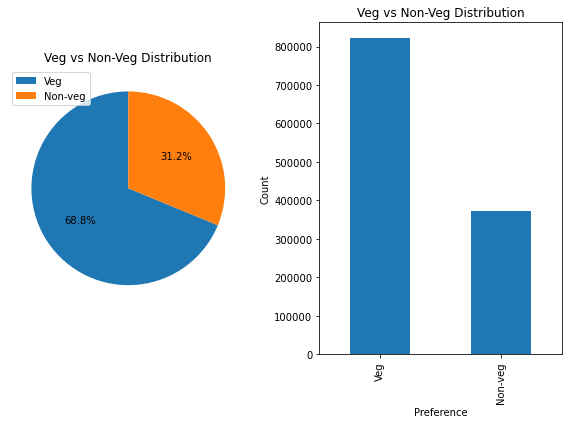

In [29]:
    veg_counts = zomato_final['veg_or_non_veg'].value_counts()

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
veg_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, labels=None)
plt.title('Veg vs Non-Veg Distribution')
plt.ylabel('') 

    
plt.subplot(1, 2, 2) # Bar Chart
veg_counts.plot(kind='bar')
plt.title('Veg vs Non-Veg Distribution')
plt.xlabel('Preference')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

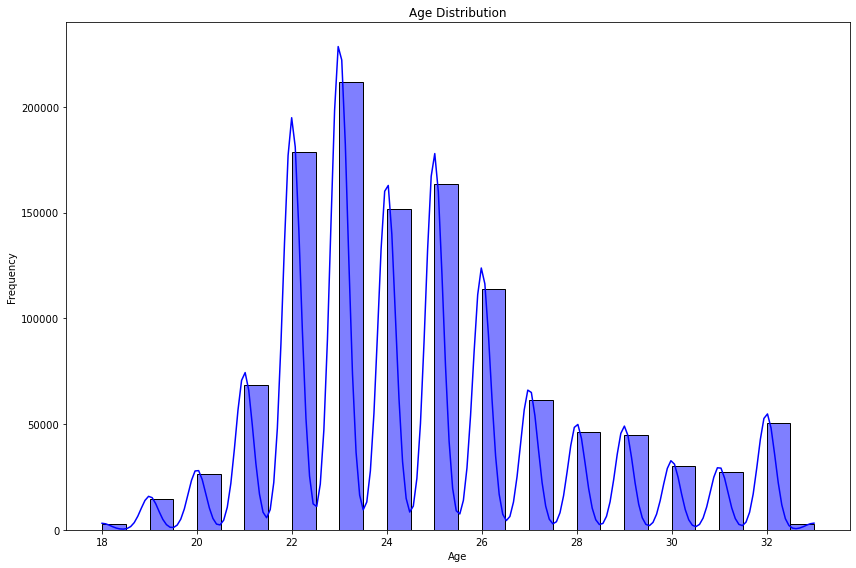

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(zomato_final['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

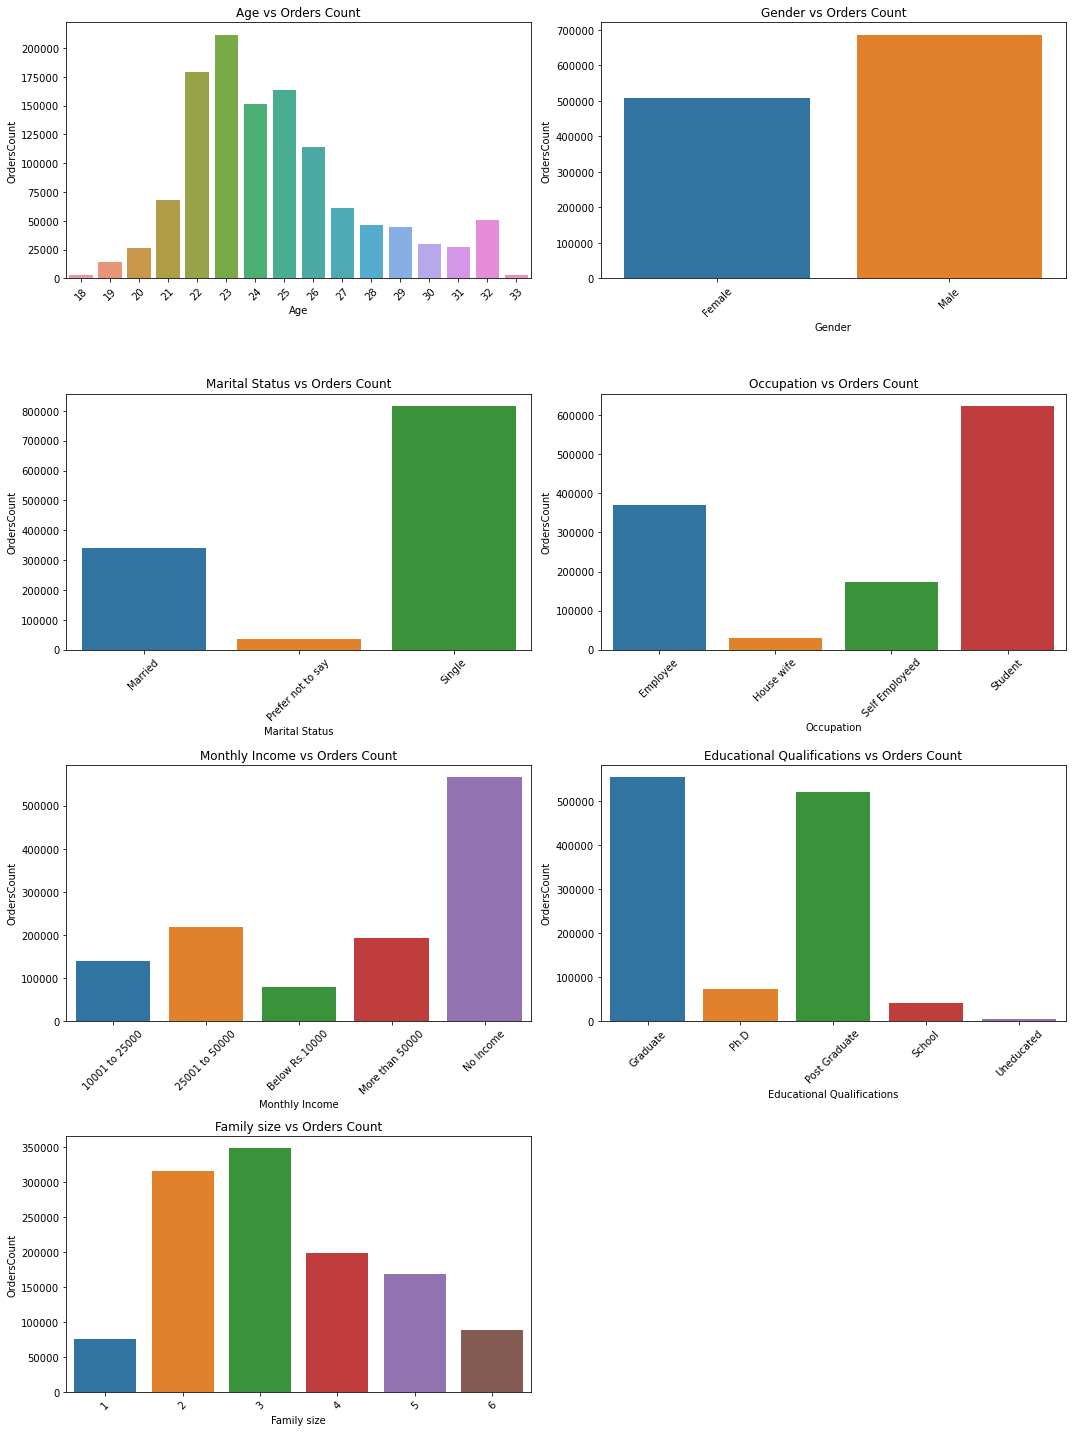

In [31]:
demographics = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']

plt.figure(figsize=(15, 20))

for index, demographic in enumerate(demographics, 1):
    grouped_data = zomato_final.groupby(demographic).size().reset_index(name='OrdersCount')
    
    plt.subplot(4, 2, index)  # Assuming there are a maximum of 8 plots, arranged in a 4x2 grid.
    sns.barplot(x=demographic, y='OrdersCount', data=grouped_data)
    
    plt.title(f'{demographic} vs Orders Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

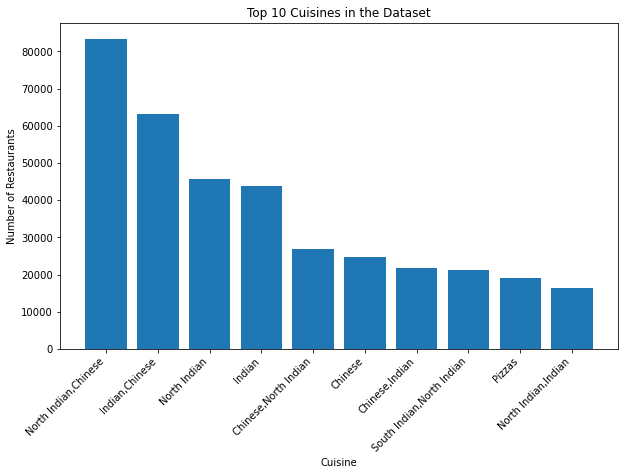

In [32]:
cuisine_counts = zomato_final['cuisine_x'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cuisines in the Dataset')
plt.show()


In [33]:

columns_to_encode = ['veg_or_non_veg', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income','Educational Qualifications']

le = LabelEncoder()
for column in columns_to_encode:
    zomato_final[column] = le.fit_transform(zomato_final[column])

In [34]:
zomato_final.isna().sum()

f_id                          0
item                          0
veg_or_non_veg                0
menu_id                       0
r_id                          0
cuisine_x                     0
order_date                    0
sales_qty                     0
sales_amount                  0
user_id                       0
name_x                        0
city                          0
rating                        0
rating_count                  0
cost                          0
address                       0
name_y                        0
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
dtype: int64

In [35]:
def find_similar_users(zomato_final, user_id, n=10):
    # if the input user_id exists in the dataset. If it exists, use that user's data, otherwise, selecting a random user.
    if user_id in zomato_final['user_id'].values:
        user = zomato_final[zomato_final['user_id'] == user_id].iloc[0]
    else:
        user = zomato_final.sample(1).iloc[0]
    others = zomato_final[zomato_final['user_id'] != user_id] # Filtering the original user to get all other users.
    demo = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']
    vector = user[demo].values   # Get the attributes of the selected user in a vector.
    others['similarity'] = others.apply(lambda x: np.sum((x[demo].values - vector)**2), axis=1)# For every other user, calculating the sum of squared differences with the selected user across all attributes.
    similar_users = others.sort_values('similarity').head(n)['user_id'].unique().tolist()# Sorting the other users by their similarity values and get the top n similar user_ids.
    return similar_users


In [36]:
def get_top_dishes_for_restaurant(zomato_final, r_id):
    top_dishes = zomato_final[zomato_final['r_id'] == r_id].groupby('f_id').sum()['sales_qty'].sort_values(ascending=False).head(3).index.tolist()
    return top_dishes if len(top_dishes) == 3 else top_dishes

In [41]:
def recommend_dishes(zomato_final, user_id, city):
    similar_users = find_similar_users(zomato_final, user_id)
    zomato_final = zomato_final[zomato_final['city'] == city]  # Filtering the dataset by the input city.
    user_data = zomato_final[zomato_final['user_id'] == user_id]
    similar_users_data = zomato_final[zomato_final['user_id'].isin(similar_users)]
    user_restaurants = set()  # Sets for restaurant IDs.
    similar_users_restaurants = set()
    # If we have the data for the user, find out their preferred type of food (veg/non-veg) and cuisine and filtering the data according to this preferences.
    if not user_data.empty:
        user_pref_veg = user_data['veg_or_non_veg'].values[0]
        user_pref_cuisine = user_data['cuisine_x'].values[0]
        user_restaurants = set(zomato_final[(zomato_final['veg_or_non_veg'] == user_pref_veg) & 
                                           (zomato_final['cuisine_x'] == user_pref_cuisine)]['r_id'].unique())
    # For the similar users, find out the most common food type and cuisine they prefer and filtering the data.
    if not similar_users_data.empty:
        similar_pref_veg = similar_users_data['veg_or_non_veg'].mode().iloc[0]
        similar_pref_cuisine = similar_users_data['cuisine_x'].mode().iloc[0]
        similar_users_restaurants = set(zomato_final[(zomato_final['veg_or_non_veg'] == similar_pref_veg) & 
                                                    (zomato_final['cuisine_x'] == similar_pref_cuisine)]['r_id'].unique())
    combined_restaurants = list(user_restaurants | similar_users_restaurants)# Combining the two restuarant names
    if combined_restaurants: #arranging in asceding order according to sales quantity sum
        combined_restaurants = zomato_final[zomato_final['r_id'].isin(combined_restaurants)].groupby('r_id').sum()['sales_qty'].sort_values(ascending=False).index.tolist()
    # The loop when there are less than 3 in the reccomenations.
    if len(combined_restaurants) < 3:
        top_restaurants = zomato_final.groupby('r_id').sum()['sales_qty'].sort_values(ascending=False).head(3 - len(combined_restaurants)).index.tolist()
        combined_restaurants.extend(top_restaurants)
    combined_restaurants = combined_restaurants[:3]
    top_dishes_per_restaurant = {r_id: get_top_dishes_for_restaurant(zomato_final, r_id) for r_id in combined_restaurants}

    # Replace restaurant IDs with their names
    restaurant_names = zomato_final.drop_duplicates(subset='r_id').set_index('r_id')['name_x'].to_dict()
    dish_names = zomato_final.drop_duplicates(subset='f_id').set_index('f_id')['item'].to_dict()

    named_output = {
        'Top Restaurants and their Top Dishes': {
            restaurant_names[r_id]: [dish_names[f_id] for f_id in dishes] 
            for r_id, dishes in top_dishes_per_restaurant.items()
        }
    }
    
    return named_output


In [39]:
user_id_input = 6111  # Example user_id
city_input = 'Abohar'  # Example city

recommendations = recommend_dishes(zomato_final, user_id_input, city_input)
print(recommendations)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7700\2331877866.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others['similarity'] = others.apply(lambda x: np.sum((x[demo].values - vector)**2), axis=1)# For every other user, calculating the sum of squared differences with the selected user across all attributes.


{'Top Restaurants and their Top Dishes': {'CHAWLA SAAB THE JUICE MASTER': ['Aloo Tikki Burger', 'Cold Sandwich', 'Achari Maggi'], 'AB FOODS POINT': ['Aloo Tikki Burger', 'Kit   K at Shake', 'Nutela Shake'], 'Shri Balaji fast food and Variety store': ['Aloo Tikki Burger', 'Special King Size Burger', 'Aloo Tikki Paneer Burger']}}


In [40]:
result = pd.DataFrame(data= recommendations)
result 

,Top Restaurants and their Top Dishes
AB FOODS POINT,"[Aloo Tikki Burger, Kit K at Shake, Nutela S..."
CHAWLA SAAB THE JUICE MASTER,"[Aloo Tikki Burger, Cold Sandwich, Achari Maggi]"
Shri Balaji fast food and Variety store,"[Aloo Tikki Burger, Special King Size Burger, ..."
